In [8]:
import osmnx as ox
import networkx as nx
import igraph as ig

import pandas as pd

In [9]:
G = ox.load_graphml('./data/Manhattan.graphml')
G_ig = ig.Graph(directed=True)
G_ig.add_vertices(list(G.nodes()))
G_ig.add_edges(list(G.edges()))

In [9]:
speed = pd.read_csv('D:\大论文\Result1\Phen.csv', header=None)
speed

,0,1,2,3,4,5
0,8.402805,2.504529,7.873099,5.985091,2.832323,2.988663


In [11]:
x1, x2, x3, x4, x5, x6 = speed.iloc[0,:]

In [12]:
speed = {'unclassified':x1, 'tertiary':x2, 'primary':x3, 'secondary':x4, 'residential':x5, 'else':x6}

In [13]:
speed

{'unclassified': 8.402804515957836,
 'tertiary': 2.50452866845624,
 'primary': 7.873099160075504,
 'secondary': 5.985090969643027,
 'residential': 2.832322594697266,
 'else': 2.988663158535777}

In [14]:
def get_speed(string:str, speed=speed):
    return speed.get(string, speed['else'])

In [28]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [29]:
gdf_edges['highway'] = gdf_edges['highway'].astype(str)

In [30]:
gdf_edges['speed'] = gdf_edges['highway'].apply(get_speed)

In [31]:
gdf_edges['travel_time'] = gdf_edges['length'] / gdf_edges['speed']

In [32]:
G_ig.es['travel_time'] = gdf_edges['travel_time']

In [33]:
new_G = ox.graph_from_gdfs(gdf_nodes, gdf_edges)

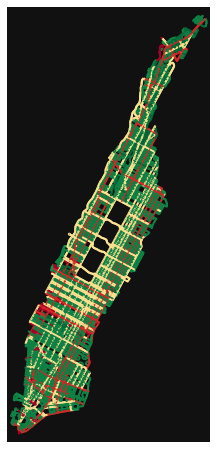

In [54]:
ec = ox.plot.get_edge_colors_by_attr(new_G, attr='speed', cmap='RdYlGn_r')
fig, ax = ox.plot_graph(new_G, node_color='w', node_edgecolor='k', node_size=0,
                        edge_color=ec, edge_linewidth=2)

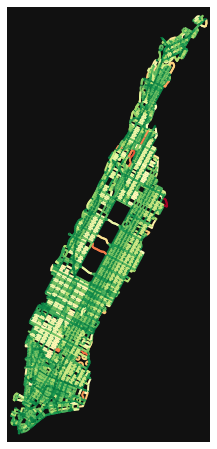

In [42]:
ec = ox.plot.get_edge_colors_by_attr(new_G, attr='travel_time', cmap='RdYlGn_r')
fig, ax = ox.plot_graph(new_G, node_color='w', node_edgecolor='k', node_size=0,
                        edge_color=ec, edge_linewidth=2)

In [43]:
# pd.DataFrame(gdf_edges.groupby('highway')['length'].sum()).sort_values('length')

In [50]:
gdf_edges['travel_time'].to_csv('./multi/travel_time.csv', index=False)